### Chapter 3.5 
# M(x)/M/K System with State-dependent Arrival Rates

---
>(c) Tobias Hossfeld  (Aug 2021)<br><br>
> This script and the figures are part of the following book. The book is to be cited whenever the script is used (copyright CC BY-SA 4.0):<br>
> *Tran-Gia, P. & Hossfeld, T. (2021). 
Performance Modeling and Analysis of Communication Networks - A Lecture Note.
Würzburg University Press.*
> *https://doi.org/10.25972/WUP-978-3-95826-153-2*

---

We consider a loss system with $K$ servers. If all $K$ servers are occupied, incoming arrivals are rejected. The interarrival times $A_i$ are negative exponentially distributed with rate $\lambda_i$ when the system is in state $[X=i]$ for $i=0,\dots,K$. The service time of a job follows an exponential distribution with rate $\mu$. 

The state-dependent arrival rates are denoted with M(x) - or sometimes M$_x$ - in Kendall's notation: M(x)/M/K-0 


## Analysis of the System
The system is a Markovian system. To be more precise, we have a birth-and-death process, since transitions occur only between neighboring states. The state of the system is the number $X$ of jobs in the system. 

![State transition diagram of the M(x)/M/K-0 system with state-dependent arrival rates](MMK-state-dependent-arrivals.png)

The transition rate $[X=i] \to [X=i+1]$ corresponds to the state-dependent arrival rate and we assume: 

$\lambda_i = (i+1) \lambda$ for a given $\lambda$ and $i=0,\dots,K$.

Since there are $K$ servers, the service rate is

$\mu_i = i \mu$ für $i=1,\dots, K$.

### State Probabilities
The state probabilites are $P(X=i)=x(i)$.

The macro state equations are 

$\lambda_{i-1} x(i-1) = \mu_{i} x(i)$ for $i=0,\dots K-1$. 

We obtain the following state probabilities with the parameter $a = \lambda/\mu$:

$
x(i) = \frac{\lambda_{i-1}}{\mu_i} x(i-1) = \frac{i \lambda}{i \mu} x(i-1) = a \cdot x(i-1) = a^i x(0)
$

The state probability for the empty system $x(0)$ follows accordingly:

$1 = \sum_{i=0}^K x(i) = \sum_{i=0}^K a^i x(0) = x(0) \sum_{i=0}^K a^i = x(0) \frac{1-a^{K+1}}{1-a} \quad \Rightarrow \quad x(0) = \frac{1-a}{1-a^{K+1}}$

## Blocking Probability
The PASTA property must not be applied here, since the arrival process is *not* a Poisson process (although the interarrival times are exponentially distributed, but with state-dependent arrival rates). 

As a consequence, we need to derive the state probability $x_A(i)$ that an arriving customer finds the system in state $[X_A=i]$. Then, the blocking probability is

$p_B = x_A(K)$.

To this end, we use the strong law of large numbers for Markov chains.

$
x_A(i) = \frac{\lambda_i \cdot x(i)}{\sum_{i=0}^K \lambda_i \cdot x(i)} 
$

Note that the denominator is the mean arrival rate $\bar{\lambda}$ of the system: 

$
\bar{\lambda} = E[\lambda] = \sum_{i=0}^K \lambda_i x(i) = \sum_{i=0}^K (i+1)\lambda a^i \frac{1-a}{1-a^{K+1}} = \lambda \left( \frac{2-a}{1-a}+K - \frac{K+1}{1-a^{K+1}} \right)
$

Da die PASTA-Eigenschaft nicht gilt, muss nach den relativen Häufigkeiten der Ankünfte gewichtet werden, um die Zustandswahrscheinlichkeiten $x_A(i)$ bei Ankünften herzuleiten.

$
x_A(i) = \frac{\lambda_i}{\bar{\lambda}}  \cdot x(i)
$

Finally, we obtain:

$
p_B = x_A(K) = \frac{(K+1)\lambda}{\bar{\lambda}} x(K) = \frac{(a-1)^2 (K+1) a^K}{((a-1) K+a-2) a^{K+1}+1}
$


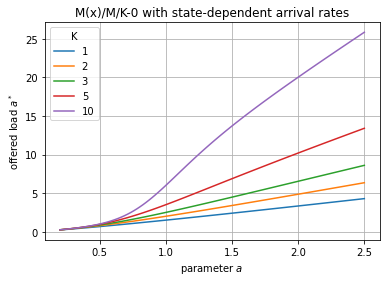

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# average arrival rate
def EL(L, a=1, K=10):
    return (L + a**(1 + K)*(-2 + a + (-1 + a)*K)*L)/((-1 + a)*(-1 + a**(1 + K)))

a = np.linspace(0.2, 2.5, 100)

for k in (1, 2, 3, 5, 10):
    lam = 1
    mu = lam/a
    astar = EL(lam, a=a, K=k)/mu # the offered load is the mean arrival rate EL/mu
    plt.plot(a, astar,label=k)
  
plt.xlabel('parameter $a$')
plt.ylabel('offered load $a^*$')
plt.legend(title='K');
plt.grid(which='major')
plt.title('M(x)/M/K-0 with state-dependent arrival rates');
    

x(0)=0.0159 for a=2 und K=5
mean arrival rate: lambda*=5.0952 for a=2, K=5, lambda=1.0
pB=0.5981 for a=2 and K=5


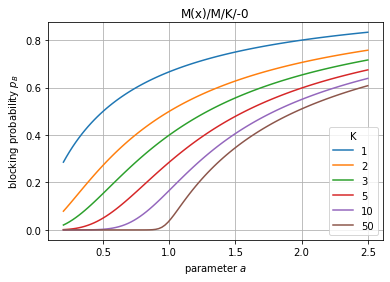

In [8]:
# probability for empty system
def x0(a=1, K=10):
    return (1-a)/(1-a**(K+1))

# blocking probability
def pb(a=1, K=10):
    return ((-1 + a)**2*a**K*(1 + K))/(1 + a**(1 + K)*(-2 + a + (-1 + a)*K))

# plot the blocking probability depending on a and K
a = np.linspace(0.2, 2.5, 100)
for k in (1, 2, 3, 5, 10, 50):
    plt.plot(a, pb(a=a, K=k), label=k)

plt.grid()
plt.xlabel('parameter $a$')
plt.ylabel('blocking probability $p_B$')
plt.legend(title='K');
plt.title('M(x)/M/K-0');

# Some concrete numbers for an example system
a, K, lam = 2, 5, 1.0
print(f'x(0)={x0(a=a,K=K):.4f} for a={a} und K={K}')
print(f'mean arrival rate: lambda*={EL(L=lam, a=a,K=K):.4f} for a={a}, K={K}, lambda={lam}')
print(f'pB={pb(a=a,K=K):.4f} for a={a} and K={K}')

## Mean Number of Customers in the System

Due to Little's law: $E[X] = (1-p_B)\bar{\lambda} \cdot E[B] = (1-p_B)\bar{\lambda} \cdot \frac{1}{\mu}$.

Alternatively:
$E[X]=\sum_{i=0}^K i \cdot x(i) = \sum_{i=0}^K i \cdot a^i \cdot x(0) = x(0) \frac{a(Ka^{K+1}-(K+1)a^K+1)}{(1-a)^2} = \frac{a(Ka^{K+1}-(K+1)a^K+1)}{(1-a)(1-a^{K+1})}$




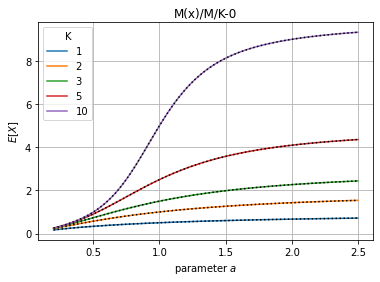

In [10]:
# Little's Law
def EX(L, a=1, K=10):
    mu = L/a
    return (1-pb(a=a, K=K)) * EL(L, a=a, K=K)/mu

# Alternatively
def EX2(a=1, K=10):     
    i = np.arange(K+1)
    return [(i*thea**i*x0(a=thea,K=K)).sum() for thea in a]

a = np.linspace(0.2, 2.5, 100)

for k in (1, 2, 3, 5, 10):
    lam = 1     
    plt.plot(a, EX(lam, a=a, K=k) ,label=k)
    plt.plot(a, EX2(a=a, K=k) , 'k:')
  
plt.grid(which='major')
plt.xlabel('parameter $a$')
plt.ylabel('$E[X]$')
plt.legend(title='K');
plt.title('M(x)/M/K-0');
